# 006 MAP RESULTS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
import scipy
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import statsmodels.formula.api as sm
import copy
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import sklearn
from math import sqrt
from functools import reduce
import numpy as np
#import ee
#import geemap
import geopandas as gpd
import rioxarray as rxr
import rasterstats as rs
from rasterio.plot import show
import rasterio
import cartopy.crs as ccrs
import gdal
%matplotlib inline
plt.rcParams["font.family"] = "Arial"

# IRRI

In [2]:
ndvi = rxr.open_rasterio('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/seasonalCompositeNDVI_2001-2018_SUM_JAS.tif', masked=True)

In [3]:
pcp = rxr.open_rasterio('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/params_layers/seasonalComposite_pcp_JAS.tif')
lstday = rxr.open_rasterio('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/params_layers/seasonalComposite_LST_Day_1km_JAS.tif')
lstnight = rxr.open_rasterio('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/params_layers/seasonalComposite_LST_Night_1km_JAS.tif')
et = rxr.open_rasterio('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/params_layers/seasonalComposite_et_JAS.tif')
pet = rxr.open_rasterio('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/params_layers/seasonalComposite_pet_JAS.tif')
elevation = rxr.open_rasterio('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/ch3_elevation.tif')
slope = rxr.open_rasterio('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/ch3_slope.tif')
pcp

<xarray.DataArray (band: 18, y: 575, x: 677)>
[7006950 values with dtype=float32]
Coordinates:
  * band         (band) int64 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18
  * y            (y) float64 1.292e+06 1.292e+06 ... 1.149e+06 1.149e+06
  * x            (x) float64 3.774e+05 3.776e+05 ... 5.461e+05 5.464e+05
    spatial_ref  int64 0
Attributes:
    STATISTICS_MAXIMUM:        2028.9963378906
    STATISTICS_MEAN:           984.94199383651
    STATISTICS_MINIMUM:        301.31936645508
    STATISTICS_STDDEV:         362.36475425255
    STATISTICS_VALID_PERCENT:  73.95
    scale_factor:              1.0
    add_offset:                0.0
    long_name:                 ('0_precipitation', '1_precipitation', '2_prec...
    grid_mapping:              spatial_ref

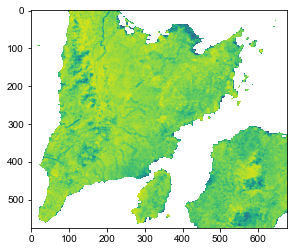

<AxesSubplot:>

In [4]:
show(ndvi.isel(band=0))

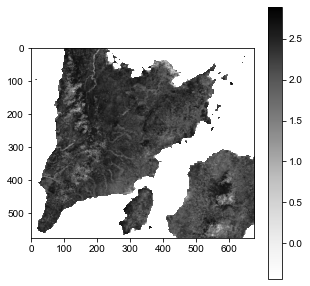

In [5]:
fig, ax = plt.subplots(figsize=(5, 5))

img = ndvi.isel(band=0)
# use imshow so that we have something to map the colorbar to
image_hidden = ax.imshow(img, 
                         cmap='Greys', 
                        # vmin=-30, 
                        # vmax=30
                        )

# plot on the same axis with rio.plot.show
image = rasterio.plot.show(img, 
                      #transform=ndvi.transform, 
                      ax=ax, 
                      cmap='Greys', 
                      #vmin=-30, 
                      #vmax=30
                     )

# add colorbar using the now hidden image
fig.colorbar(image_hidden, ax=ax)


In [12]:
yieldFinal = -2.1038 + 4.0309*ndvi.mean() + 0.3998*slope + 0.0012*pcp.mean() -0.1362*lstday.mean()
yieldFinal

<xarray.DataArray (band: 1, y: 579, x: 689)>
array([[[4.39177105, 4.39177105, 4.39177105, ..., 4.39177105,
         4.39177105, 4.39177105],
        [4.39177105, 4.39177105, 4.39177105, ..., 4.39177105,
         4.39177105, 4.39177105],
        [4.39177105, 4.39177105, 4.39177105, ..., 4.39177105,
         4.39177105, 4.39177105],
        ...,
        [4.39177105, 4.39177105, 4.39177105, ..., 4.39177105,
         4.39177105, 4.39177105],
        [4.39177105, 4.39177105, 4.39177105, ..., 4.39177105,
         4.39177105, 4.39177105],
        [4.39177105, 4.39177105, 4.39177105, ..., 4.39177105,
         4.39177105, 4.39177105]]])
Coordinates:
    spatial_ref  int64 0
  * band         (band) int64 1
  * y            (y) float64 11.69 11.68 11.68 11.68 ... 10.4 10.39 10.39 10.39
  * x            (x) float64 121.9 121.9 121.9 121.9 ... 123.4 123.4 123.4 123.4

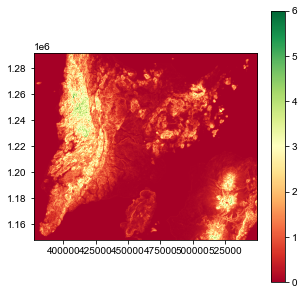

In [14]:
fig, ax = plt.subplots(figsize=(5, 5))

img = yieldFinal.isel(band=0)
# use imshow so that we have something to map the colorbar to
image_hidden = ax.imshow(img, 
                         cmap='RdYlGn', 
                        vmin=0, 
                         vmax=6
                        )

# plot on the same axis with rio.plot.show
image = rasterio.plot.show(img, 
                      transform=rasterio.open('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/seasonalCompositeNDVI_2001-2018_SUM_JAS.tif').transform, 
                      ax=ax, 
                      cmap='RdYlGn', 
                      #vmin=0, 
                      #vmax=6
                     )

# add colorbar using the now hidden image
fig.colorbar(image_hidden, ax=ax)


In [58]:
lc = rxr.open_rasterio('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/final_dry_LC_Resample11.tif').squeeze()
lc

<xarray.DataArray (y: 597, x: 710)>
[423870 values with dtype=uint8]
Coordinates:
    band         int64 1
  * y            (y) float64 1.293e+06 1.293e+06 ... 1.144e+06 1.144e+06
  * x            (x) float64 3.709e+05 3.711e+05 ... 5.479e+05 5.481e+05
    spatial_ref  int64 0
Attributes:
    RepresentationType:      THEMATIC
    STATISTICS_COVARIANCES:  2.442403152972072
    STATISTICS_MAXIMUM:      6
    STATISTICS_MEAN:         2.2419185822865
    STATISTICS_MINIMUM:      1
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       1.5628189763924
    _FillValue:              255.0
    scale_factor:            1.0
    add_offset:              0.0
    grid_mapping:            spatial_ref

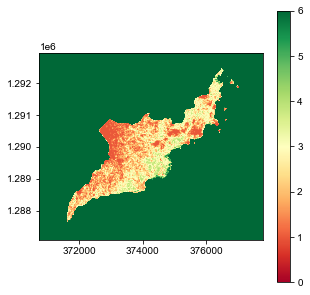

In [53]:
fig, ax = plt.subplots(figsize=(5, 5))

# use imshow so that we have something to map the colorbar to
image_hidden = ax.imshow(lc, 
                         cmap='RdYlGn', 
                        vmin=0, 
                         vmax=6
                        )

# plot on the same axis with rio.plot.show
image = rasterio.plot.show(lc, 
                      transform=rasterio.open('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/final_dry_LC.tif').transform, 
                      ax=ax, 
                      cmap='RdYlGn', 
                      vmin=0, 
                      vmax=6
                     )

# add colorbar using the now hidden image
fig.colorbar(image_hidden, ax=ax)


In [67]:
testYield = yieldNDVI.isel(band=1)*(lc==3) # 3= rainfed 4=irrigated

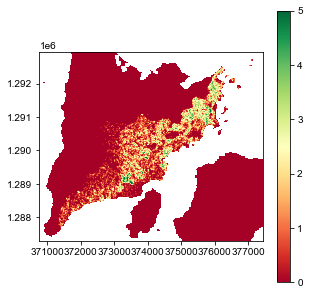

In [68]:
fig, ax = plt.subplots(figsize=(5, 5))

# use imshow so that we have something to map the colorbar to
image_hidden = ax.imshow(testYield, 
                         cmap='RdYlGn', 
                        vmin=0, 
                         vmax=5
                        )

# plot on the same axis with rio.plot.show
image = rasterio.plot.show(testYield, 
                      transform=rasterio.open('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/final_dry_LC.tif').transform, 
                      ax=ax, 
                      cmap='RdYlGn', 
                      vmin=0, 
                      vmax=5
                     )

# add colorbar using the now hidden image
fig.colorbar(image_hidden, ax=ax)


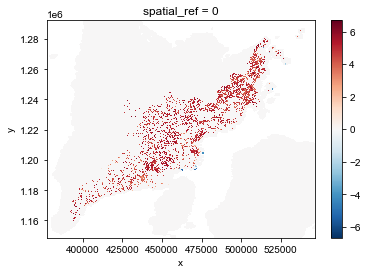

In [73]:
testYield.plot()